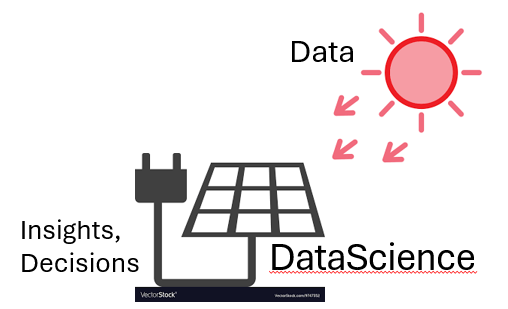

# Outline - Tutorial 0
In this tutorial, we are going to refresh our python foundations and learn how to use Jupyter notebooks. <br>
First "offical" tutorial will be next week.


### Working with Python:
* Run .py files
* Interactive "read-eval-print" loop
    * plain *python* command in cmd/bash (CLI)
    * IPython (CLI+)
    * Jupyter Notebook (GUI)
* How Jupyter works:
    * Python-facing process ("kernel"):
        * Local Server
        * Remote Server
        * Cloud Server, e.g. Google Colab
    * User-facing process (interactive window):
        * Browser (e.g., Chrome)
        * IDE (e.g., Visual Studio Code)

Quickstart options (personal recommendations):
- Install VS code, open notebook, follow instructions 
- open notebook in google colab

**Notebook workflow:**
- All your needs in one place as you work
- Self-contained code + results when you share - **reproducibility**.

Can escape to system console with '!' prefix, but using [magic](https://www.geeksforgeeks.org/useful-ipython-magic-commands/) '%' for basic commands is usually better

In [1]:
#!ls -ltrh sample_data     # linux
#!dir .                     # windows
%ls    # cross-platform

 Volume in drive C is Windows
 Volume Serial Number is 5E4E-CB17

 Directory of c:\Users\ronmo\Desktop\Intro_DS\TA0


 Directory of c:\Users\ronmo\Desktop\Intro_DS\TA0



File Not Found


In [2]:
# install missing libraries with command-line package manager (pip / conda):
#!pip install numpy matplotlib
# Better, ensure it installs into same environment as the one in which the notebook runs right now..
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\ronmo\appdata\local\programs\python\python310\lib\site-packages (1.22.4)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ----------- --------------------------- 30.7/104.0 kB 1.3 MB/s eta 0:00:01
     --------------------- --------------- 61.4/104.0 kB 812.7 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 997.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 7.0 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 2.6 MB/s eta 0:00:03
   - -------------------------------------- 0.4/8.1 MB 3.8 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 2.2.3 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# importing the package library (with its classes and functions under it) into our namespace
import numpy as np

# Python lets you import one/all classes\functions directly into namespace like so:
# from x import y; from z import *  
# Good practice is to try avoid, especially the (*) 
# Tracking where the func/class came from is more important than short code.

# To display the documentation of the library:
np?
# TODO: check how to "collapse" or "make scrollable" the long cell output, on your setup

Type:        module
String form: <module 'numpy' from 'c:\\Users\\ronmo\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\numpy\\__init__.py'>
File:        c:\users\ronmo\appdata\local\programs\python\python310\lib\site-packages\numpy\__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://numpy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as ``np``::

  >>> import numpy as np

Code snippets

Inline graphics:

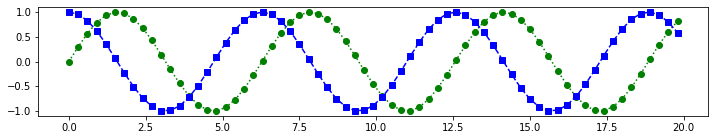

In [ ]:
from numpy import *
from matplotlib.pyplot import *  # from pylab import *


# NOTE: "matlab style" - considered bad practice in python. Never use *, prefer import numpy as np, then np.arange

x = arange(0, 20, 0.3)

figure(figsize=(12, 2))

# plot inline

plot(x, sin(x), "go:", x, cos(x), "bs--")

# also save current fig for outside usage

savefig("my.png")

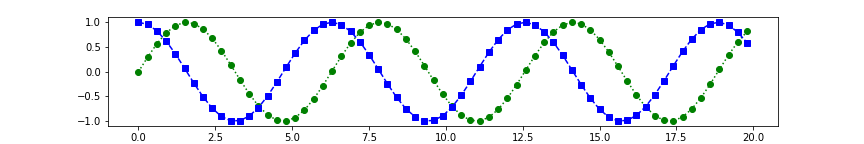

In [ ]:
# Image exported as figure can be used elsewhere - but also displayed here
from IPython.display import Image, display

display(Image("my.png"))
# Can of course be used to paste any image you want manully;
#  another option is to Ctrl+V directly into a markdown cell (see top cell)

### Python Foundations
* Variables / Types
* Operators
* Functions
* Classes
* Libraries

#### Variables:
**single element**: int, float, etc.

In [6]:
x = 3
y = 1.0
x, type(x), y, type(y)

(3, int, 1.0, float)

In [7]:
x + y  # implicit casting

4.0

**multiple elements**: strings, tuple, list, dictionary:

<u>Note:</u> Python is a 0-index language. l[0] is the first element in a list and not l[1].

In [8]:
s = "Hello"
s, s[2]

('Hello', 'l')

In [ ]:
s1 = "Hello"
s1

'Hello'

In [10]:
print(f"{s} World")

Hello World


In [11]:
print("Hello ' world")

Hello ' world


In [12]:
s

'Hello'

In [13]:
l = [1, 2, 3, 4]
l

[1, 2, 3, 4]

In [14]:
l[2]

3

In [ ]:
l = list("hello")
l

['h', 'e', 'l', 'l', 'o']

In [ ]:
l * 3

['h', 'e', 'l', 'l', 'o', 'h', 'e', 'l', 'l', 'o', 'h', 'e', 'l', 'l', 'o']

In [ ]:
l2 = [s, s + "!", s * 2, "_".join(s)]
l2

['Hello', 'Hello!', 'HelloHello', 'H_e_l_l_o']

In [18]:
d = dict()
d

{}

In [19]:
d = {"age": 18, "height": 180}
# (?) Dict is just like list of pairs - true or false?
print(d)
print(list(d.items()))
print(dict(list(d.items())))
# (!) dict: search speed&access, order by keys (though OrderedDict available), mutability

{'age': 18, 'height': 180}
[('age', 18), ('height', 180)]
{'age': 18, 'height': 180}


In [ ]:
d["height"] = 181
d

{'age': 18, 'height': 181}

In [ ]:
d["gender"]

KeyError: 'gender'

In [ ]:
# 'Graceful' handling of errors:
if d.get("gender") is None:
    print("gender info missing")
# 'Default' value:
d.get("gender", "missing")

gender info missing


'missing'

Mutable vs  Immutable:

In [23]:
l

['h', 'e', 'l', 'l', 'o']

In [ ]:
l[3] = "123"
l

['h', 'e', 'l', '123', 'o']

In [25]:
t = (1, 2, 3)
t

(1, 2, 3)

In [26]:
t[1] = -12

TypeError: 'tuple' object does not support item assignment

Indexing

In [27]:
a = list(range(100)[80:15:-20])  # start, stop, step
a, a[::-1]

([80, 60, 40, 20], [20, 40, 60, 80])

In [ ]:
b = [[1, 2, 3, 4, 5], [10, 20, 30, 40, 50]]
b[1][1:3]
# b[1:3][1] # ?

[20, 30]

#### Loops

In [31]:
for i in range(3):
    print(i)

print()

j = 0
while j < 10:
    print(j)
    j += 2

0
1
2

0
2
4
6
8


#### Comprehensions
List comprehension & dict comprehension

In [32]:
print([x**2 for x in range(0, 5)])

[0, 1, 4, 9, 16]


In [33]:
# Find squares with last digit of 4),
print({x: x**2 for x in range(0, 100, 2) if x**2 % 10 == 4})

{2: 4, 8: 64, 12: 144, 18: 324, 22: 484, 28: 784, 32: 1024, 38: 1444, 42: 1764, 48: 2304, 52: 2704, 58: 3364, 62: 3844, 68: 4624, 72: 5184, 78: 6084, 82: 6724, 88: 7744, 92: 8464, 98: 9604}


In [34]:
b = [[1, 2, 3, 4, 5], [10, 20, 30, 40, 50], [0] * 5]
print(b[1][1:3])
# b[1:3][1] # ?
[br[1] for br in b[1:3]]

[20, 30]


[20, 0]

#### Functions
* functions declaration
* **scope:** global vs local variables vs arguments


In [36]:
# function
c = 1

def func1():
    c = 2
    return "Hello from a function " * c

func1()

'Hello from a function Hello from a function '

In [37]:
c

1

In [38]:
# defaults, passing by position/name
a, b = 2, 3

def func2(a, b, c=2):
    return a * b * c


func2(a, b), func2(a, b, 3), func2(a, c=3, b=b)

(12, 18, 18)

In [39]:
# variable length args list


def func3(*argv):
    """
    argv is a list.
    By the way - this is how you write multi-line comments...
    """
    output = 0.1

    for arg in argv:
        print("got arg: ", arg)
        output += arg

    return output


# try to add more inputs
func3(1, 30, 1e3)

got arg:  1
got arg:  30
got arg:  1000.0


1031.1

In [40]:
1e3, inf, nan

(1000.0, inf, nan)

In [41]:
# unnamed args list & named args dict (keyword args = kwargs)


def func4(*args, **kwargs):
    print("func4 running")
    print(type(args), type(kwargs))
    print("args: ", args)
    print("kwargs: ", kwargs)
    a = kwargs["a"]
    b, c = kwargs["b"], kwargs["c"]
    print("a,b,c: ", a, b, c)

    return a * b * c


func4(3, 4, a=1, b=3, c=1e3, d="what is d?", e="last name")

func4 running
<class 'tuple'> <class 'dict'>
args:  (3, 4)
kwargs:  {'a': 1, 'b': 3, 'c': 1000.0, 'd': 'what is d?', 'e': 'last name'}
a,b,c:  1 3 1000.0


3000.0

In [43]:
# forwarding (e.g., plot()-->line())


def func5(x, y, **kwargs):
    print("func5 running")
    print("x, y: ", x, y)
    func4(**kwargs)


func5(3, 5, a=3, b=4, c=8) # (?) why no return value from func4?
print("---")
func5(3, 5, **{"a": 3, "b": 4, "c": 8})

func5 running
x, y:  3 5
func4 running
<class 'tuple'> <class 'dict'>
args:  ()
kwargs:  {'a': 3, 'b': 4, 'c': 8}
a,b,c:  3 4 8
---
func5 running
x, y:  3 5
func4 running
<class 'tuple'> <class 'dict'>
args:  ()
kwargs:  {'a': 3, 'b': 4, 'c': 8}
a,b,c:  3 4 8


In [44]:
"""Towards good reusable functions (SW engineering good practice):
good names, documentation, input checks, exceptions managing, etc etc

NOTE: in Data Science, we're tempted to move fast ("exploration mode") and neglect good code in contrast to Software Engineering;
but in fact we should actually give extra care !!!  as in Data Science code-bugs / data-bugs / algo-bugs can games with one another.
"""


def calc_payment(price: float, amount: float, discount_perc: float = 0) -> float:
    """
    Calculate the payment for buying an item.
    :param price: Price of the item
    :param amount: Amount of items
    :param discount_perc: Discount percentage
    :return: Payment amount
    """
    # NOTE: types declaration is not self-enforcing but good for doc. We should test explicitly:
    assert all([type(x) in [int, float] for x in (price, amount, discount_perc)])
    # TODO why type test comes first? TODO how the line works? (analyze comprehension)
    assert discount_perc >= 0 and discount_perc <= 100, "invalid discount percent"

    if discount_perc == 100:
        raise (ValueError("No revenue!"))

    return price * amount * (1 - discount_perc / 100)

In [45]:
# Documentation helps users to get info, just as with library functions.
calc_payment?

Signature: calc_payment(price: float, amount: float, discount_perc: float = 0) -> float
Docstring:
Calculate the payment for buying an item.
:param price: Price of the item
:param amount: Amount of items
:param discount_perc: Discount percentage
:return: Payment amount
File:      c:\users\ronmo\appdata\local\temp\ipykernel_4860\1680735640.py
Type:      function


In [46]:
# TODO go through all options, understand behavior
try:
    display(calc_payment(4, 5))
    display(calc_payment(4, 5, 20))
    display(calc_payment(4, 5, 100))
    # display( calc_payment(4, 5, 200) )
    # display( calc_payment(4, 5, "56") )

except ValueError as e:
    print(e)
    giveaway_day = True
    if giveaway_day:
        print("we give it away, yay!")
        pass
    else:
        raise (e)

20.0

16.0

No revenue!
we give it away, yay!


#### Classes

In [47]:
# new object called Student
class Student:
    def __init__(self, name, id=""):
        self.name = name
        self.id = id

    def get_name(self):
        return self.name

    def set_name(self, name):
        self.name = name

    def get_summary(self):
        return self.name.upper() + ", ID=" + self.id


# declare a Student object
student = Student("yossi", "123")
student, student.get_summary()

(<__main__.Student at 0x1b344b362c0>, 'YOSSI, ID=123')

In [48]:
# another new Student object
student2 = Student("yossi2")
student2, student2.name, student2.get_name()

(<__main__.Student at 0x1b344b36da0>, 'yossi2', 'yossi2')

In [51]:
# another Student object pointing to the same student
student3 = student
student3.get_summary()

'YOSSI, ID=123'

In [52]:
student.set_name("yarin")
student.get_name()

'yarin'

In [53]:
student3.get_name()

'yarin'

In [ ]:
# If we really want to duplicate, can use copy:
import copy

student4 = copy.copy(student3)
# verify content is not shared now.
student4.set_name("yossi")
student4.get_name(), student3.get_name()

('yossi', 'yarin')

In [56]:
class StudentData:
    def __init__(self, age=20, department="Engineering", program="B.Sc."):
        self.age = age
        self.program = program
        self.department = department


class StudentData1:
    """Equivalent to StudentData - TODO verify"""

    age = 20
    department = "Engineering"
    program = "B.Sc."


student = StudentData1()  # can't pass init modifications to constructor now..
student.age = 25

```
? Is a data object more like list or tuple? (remember mutability)
? What's better to pass into function to avoid surprising *side effects*? mutable or immutable?
? What bugs are more frequent and/or tricky in Python than in other languages?
```

##### OOP (object-oriented programming) in 1 minute:

In [57]:
"""
Functions: new code calls olds code
Classes: + old code calls new code ("polymorphism")
           --> layered SW, APIs, frameworks, .. SW engineering.
"""


class UniTeacher:
    employed = True

    def terminate(self):
        self.employed = False
        print("terminated, ")


class Assistant(UniTeacher):
    pass
    # def terminate(self):  # override!
    #    super().terminate()


class Professor(UniTeacher):
    tenure = True

    def terminate(self):  # override!
        if self.tenure:
            print("tenured, cant terminate")
        else:
            super.terminate()


staff = [Assistant(), Professor()]
for person in staff:
    person.terminate()

# TODO make all employees have names that are printed on termination

terminated, 
tenured, cant terminate


#### Iterators (BONUS)

Under the hood of "for-loop"  (BONUS, but good example of OOP)

In [58]:
ll = [1, 2, 3, 4]

ll_iter = iter(ll)  # same as ll.__iter__()
try:
    while True:
        # print(ll.__iter__().__next__())  # TODO try. What happens? Why? what to do in notebook?
        print(ll_iter.__next__())  # same as next(ll_iter)
except StopIteration as e:
    pass
    # raise(e)

# (!) the for-loop construct can be used with any object <obj> supporting this API:
#     (a) obj.__iter__() creates iterator <it1> which can do:
#     (b) <it1>.__next__(), emitting elements till :
#     (c) no more elements, signalled by raising StopIteration exception

1
2
3
4


Some common iterator manipulations:

In [59]:
d = {"a": "A", "b": "B"}
for k, v in d.items():
    print(k, v)

a A
b B


In [60]:
# enumerate(it1):  yield (running-index, value) pairs (2-tuples) ; value is what it1 yields

for ii, (k, v) in enumerate(d.items()):
    print(ii, k, v)

0 a A
1 b B


In [61]:
# zip(it1, it2):  yield (val1, val2) pairs ; where val1/2 are yielded by it1/2 respectively
for ii, (k, v) in zip(range(len(d)), d.items()):
    print(ii, k, v)

0 a A
1 b B
